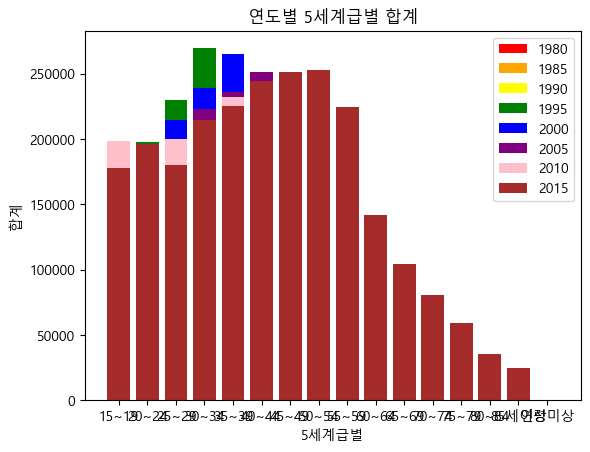

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일을 읽어옵니다
df = pd.read_excel('C:/Users/winbb/Desktop/wwq123.xlsx')

plt.rcParams['font.family'] = 'Malgun Gothic'

# '합계'가 포함된 행 제외
df_filtered = df[~df['5세계급별'].str.contains('합계')]

# 그래프에 사용할 색상을 정의합니다
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown']

# 그래프를 그릴 데이터를 선택합니다
df_selected = df_filtered[['5세계급별', '연도', '합계']]

# 그래프를 그립니다
fig, ax = plt.subplots()
for i, year in enumerate(df_selected['연도'].unique()):
    df_year = df_selected[df_selected['연도'] == year]
    df_year = df_year[df_year['합계'] != '-']  # '-'를 제외합니다
    ax.bar(df_year['5세계급별'], df_year['합계'].astype(int), color=colors[i], label=str(year))

# 그래프에 라벨과 범례를 추가합니다
ax.set_xlabel('5세계급별')
ax.set_ylabel('합계')
ax.set_title('연도별 5세계급별 합계')
ax.legend()

# 그래프를 보여줍니다
plt.show()

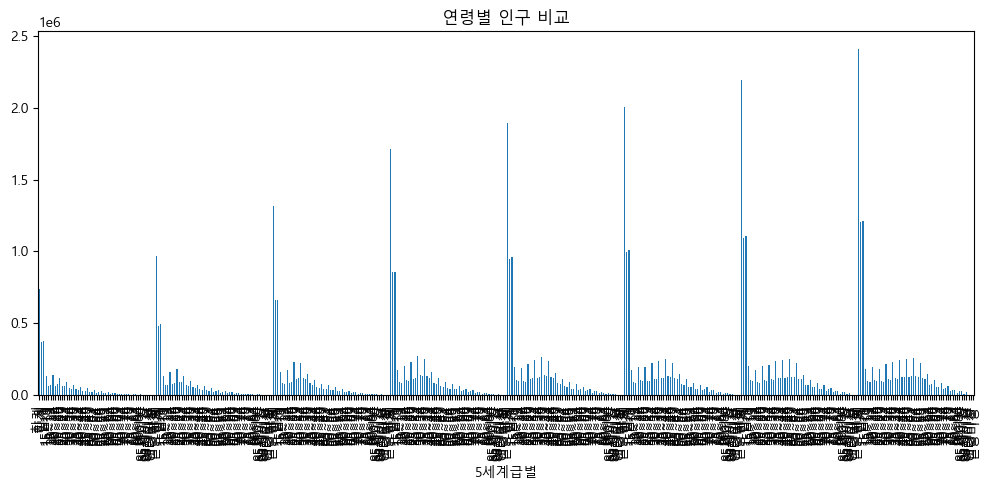

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 엑셀 파일을 읽어옵니다
df = pd.read_excel('C:/Users/winbb/Desktop/wwq123.xlsx')

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# '합계'가 포함된 행 제외
df_filtered = df[~df['5세계급별'].str.contains('합계')]

# '5세계급별'을 인덱스로 설정
df.set_index('5세계급별', inplace=True)

# '합계' 열을 숫자로 변환
df['합계'] = pd.to_numeric(df['합계'], errors='coerce')

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df['합계'].plot(kind='bar', ax=ax)
ax.set_title('연령별 인구 비교')
plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7452\848074151.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['합계'] = pd.to_numeric(df_filtered['합계'], errors='coerce')


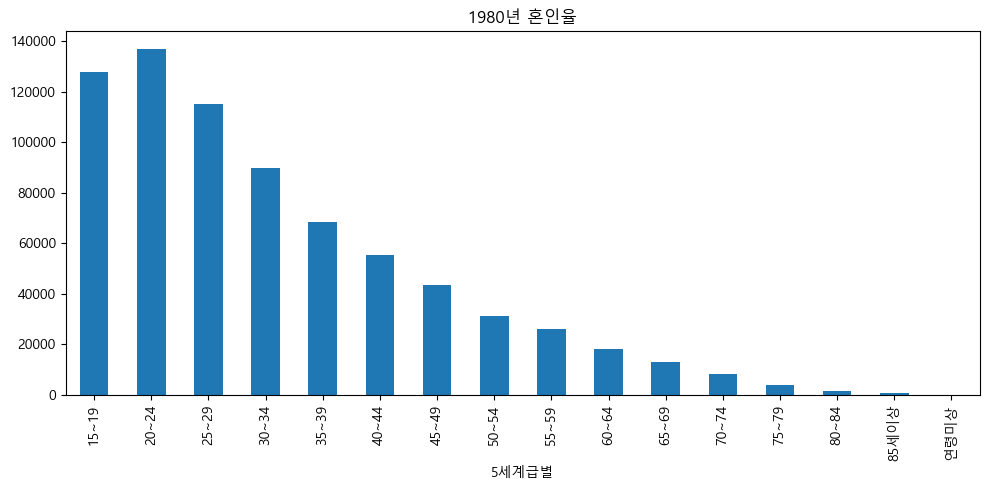

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 엑셀 파일을 읽어옵니다
df = pd.read_excel('C:/Users/winbb/Desktop/wwq123.xlsx')

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# '합계'가 포함된 행 제외
df_filtered = df[~df['5세계급별'].str.contains('합계')]

# '5세계급별'과 '성별'을 인덱스로 설정
df_filtered.set_index(['5세계급별', '성별'], inplace=True)

# '합계' 열을 숫자로 변환
df_filtered['합계'] = pd.to_numeric(df_filtered['합계'], errors='coerce')

# 1980년도 데이터만 선택
df_1980 = df_filtered[df_filtered['연도'] == 1980]

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df_1980.xs('합계', level='성별')['합계'].plot(kind='bar', ax=ax, legend=False)  # '성별' 중 '합계'만 그래프에 표시
ax.set_title('1980년 혼인율')
plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
import numpy as np

# 파일 경로 설정
file_path = 'C:/Users/winbb/Desktop/wwq123.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# '합계'가 포함된 행 제외
df_filtered = df[~df['5세계급별'].str.contains('합계')]

# '계'를 포함한 행만 필터링
df_filtered = df_filtered[df_filtered['성별'] == '합계']

# '연도'와 '합계' 열 선택
numeric_columns = df_filtered[['연도', '합계']]

# '-' 값을 NaN으로 대체
numeric_columns.replace('-', np.nan, inplace=True)

# 상관관계 분석
correlation_matrix = numeric_columns.corr()

# 상관계수 출력
print(correlation_matrix)

          연도        합계
연도  1.000000  0.391891
합계  0.391891  1.000000


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7452\3122210691.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns.replace('-', np.nan, inplace=True)


                            OLS Regression Results                            
Dep. Variable:                    혼인율   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5054
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.479
Time:                        14:56:08   Log-Likelihood:                -403.85
No. Observations:                  84   AIC:                             811.7
Df Residuals:                      82   BIC:                             816.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2769.5364   3865.224      0.717      0.4

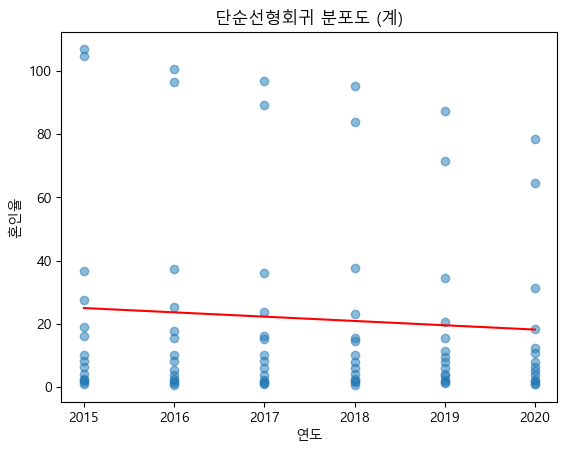

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = 'C:/Users/winbb/Desktop/ffq.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# '계'를 포함한 행만 필터링
df_filtered = df[df['성별'] == '계']

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 단순선형회귀분석을 위한 데이터 선택
X = df_filtered['연도']  # 독립 변수 선택
Y = df_filtered['혼인율']  # 종속 변수 선택

# 상수 항 추가
X = sm.add_constant(X)

# 단순선형회귀모델 학습
model = sm.OLS(Y, X)
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())

# 회귀선과 산점도 그래프 그리기
plt.scatter(X['연도'], Y, alpha=0.5)  # 산점도
plt.plot(X['연도'], results.predict(), color='red')  # 회귀선
plt.xlabel('연도')
plt.ylabel('혼인율')
plt.title('단순선형회귀 분포도 (계)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    혼인율   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5533
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.459
Time:                        15:02:12   Log-Likelihood:                -341.64
No. Observations:                  84   AIC:                             687.3
Df Residuals:                      82   BIC:                             692.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1381.6313   1843.256      0.750      0.4

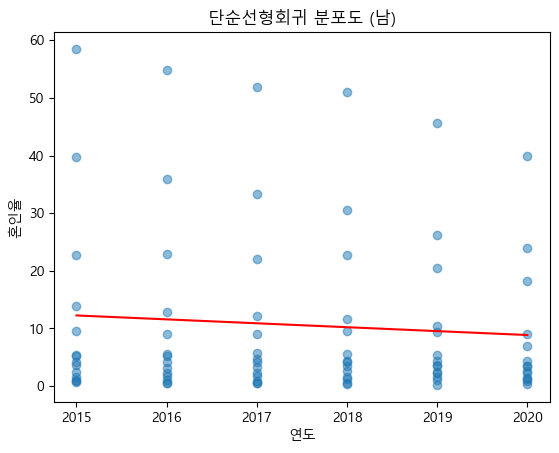

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = 'C:/Users/winbb/Desktop/ffq.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# '계'를 포함한 행만 필터링
df_filtered = df[df['성별'] == '남']

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 단순선형회귀분석을 위한 데이터 선택
X = df_filtered['연도']  # 독립 변수 선택
Y = df_filtered['혼인율']  # 종속 변수 선택

# 상수 항 추가
X = sm.add_constant(X)

# 단순선형회귀모델 학습
model = sm.OLS(Y, X)
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())

# 회귀선과 산점도 그래프 그리기
plt.scatter(X['연도'], Y, alpha=0.5)  # 산점도
plt.plot(X['연도'], results.predict(), color='red')  # 회귀선
plt.xlabel('연도')
plt.ylabel('혼인율')
plt.title('단순선형회귀 분포도 (남)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    혼인율   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4235
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.517
Time:                        15:01:41   Log-Likelihood:                -353.22
No. Observations:                  84   AIC:                             710.4
Df Residuals:                      82   BIC:                             715.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1387.9051   2115.645      0.656      0.5

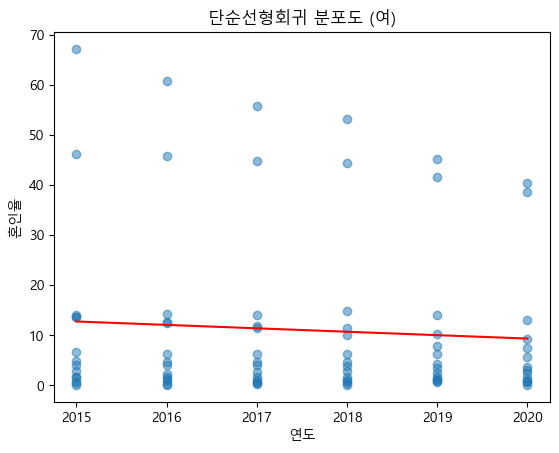

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = 'C:/Users/winbb/Desktop/ffq.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# '계'를 포함한 행만 필터링
df_filtered = df[df['성별'] == '여']

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 단순선형회귀분석을 위한 데이터 선택
X = df_filtered['연도']  # 독립 변수 선택
Y = df_filtered['혼인율']  # 종속 변수 선택

# 상수 항 추가
X = sm.add_constant(X)

# 단순선형회귀모델 학습
model = sm.OLS(Y, X)
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())

# 회귀선과 산점도 그래프 그리기
plt.scatter(X['연도'], Y, alpha=0.5)  # 산점도
plt.plot(X['연도'], results.predict(), color='red')  # 회귀선
plt.xlabel('연도')
plt.ylabel('혼인율')
plt.title('단순선형회귀 분포도 (여)')
plt.show()

In [35]:
import pandas as pd
import numpy as np

# 파일 경로 설정
file_path = 'C:/Users/winbb/Desktop/ffq.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# '계'를 포함한 행만 필터링
df_filtered = df[df['성별'] == '계']

# '연도'와 '혼인율' 열만 선택
selected_columns = df_filtered[['연도', '혼인율']]

# 상관관계 분석
correlation_matrix = selected_columns.corr()

# 상관계수 출력
print(correlation_matrix)

           연도       혼인율
연도   1.000000 -0.078269
혼인율 -0.078269  1.000000


                            OLS Regression Results                            
Dep. Variable:                    혼인율   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5054
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.479
Time:                        15:31:55   Log-Likelihood:                -403.85
No. Observations:                  84   AIC:                             811.7
Df Residuals:                      82   BIC:                             816.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2769.5364   3865.224      0.717      0.4

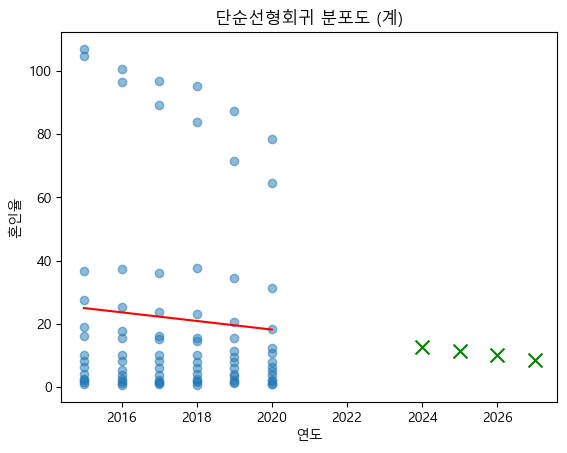

In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = 'C:/Users/winbb/Desktop/ffq.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# '계'를 포함한 행만 필터링
df_filtered = df[df['성별'] == '계']

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 단순선형회귀분석을 위한 데이터 선택
X = df_filtered['연도']  # 독립 변수 선택
Y = df_filtered['혼인율']  # 종속 변수 선택

# 상수 항 추가
X = sm.add_constant(X)

# 단순선형회귀모델 학습
model = sm.OLS(Y, X)
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())

# 예측하고자 하는 미래의 '연도' 값 설정
future_years = [2024, 2025, 2026, 2027]

# 미래 '혼인율' 값 예측
X_future = sm.add_constant(future_years)
predicted_y = results.predict(X_future)

# 예측 결과 출력
for year, prediction in zip(future_years, predicted_y):
    print(f"예측된 혼인율 ({year}년): {prediction}")

# 회귀선과 산점도 그래프 그리기
plt.scatter(X['연도'], Y, alpha=0.5)  # 산점도
plt.plot(X['연도'], results.predict(), color='red')  # 회귀선
plt.scatter(future_years, predicted_y, color='green', marker='x', s=100)  # 미래 예측 지점
plt.xlabel('연도')
plt.ylabel('혼인율')
plt.title('단순선형회귀 분포도 (계)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    혼인율   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5054
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.479
Time:                        15:31:17   Log-Likelihood:                -403.85
No. Observations:                  84   AIC:                             811.7
Df Residuals:                      82   BIC:                             816.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2769.5364   3865.224      0.717      0.4

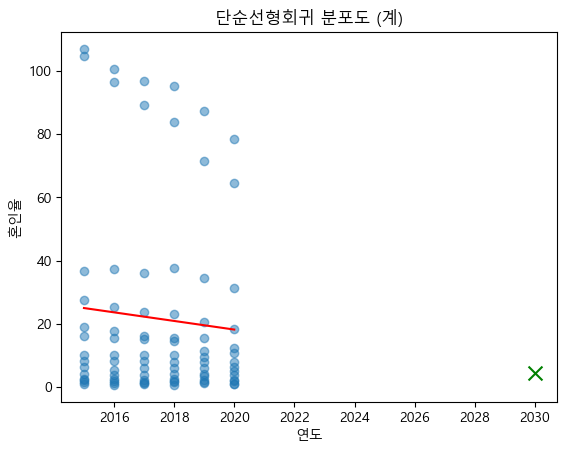

In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = 'C:/Users/winbb/Desktop/ffq.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# '계'를 포함한 행만 필터링
df_filtered = df[df['성별'] == '계']

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 단순선형회귀분석을 위한 데이터 선택
X = df_filtered['연도']  # 독립 변수 선택
Y = df_filtered['혼인율']  # 종속 변수 선택

# 상수 항 추가
X = sm.add_constant(X)

# 단순선형회귀모델 학습
model = sm.OLS(Y, X)
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())

# 예측하고자 하는 미래의 '연도' 값 설정
future_year = 2030

# 미래 '혼인율' 값 예측
X_future = np.array([1, future_year])
predicted_y = results.predict(X_future)

print(f"예측된 혼인율: {predicted_y[0]}")

# 회귀선과 산점도 그래프 그리기
plt.scatter(X['연도'], Y, alpha=0.5)  # 산점도
plt.plot(X['연도'], results.predict(), color='red')  # 회귀선
plt.scatter([future_year], predicted_y, color='green', marker='x', s=100)  # 미래 예측 지점
plt.xlabel('연도')
plt.ylabel('혼인율')
plt.title('단순선형회귀 분포도 (계)')
plt.show()

  성별    연도       연령별   혼인율
0  계  2015     일반혼인율  27.6
1  남  2015     일반혼인율  13.9
2  여  2015     일반혼인율  13.7
3  계  2015  15 ~ 19세   2.4
4  남  2015  15 ~ 19세   0.7
